In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# 라이브러리 추가
import urllib.request
import json
import pandas as pd
import seaborn as sns; sns.set(style='darkgrid', font='KoPubDotum', font_scale=1.5)
import matplotlib.pyplot as plt

In [3]:
# 데이터랩 API를 이용한 검색량 조회 함수(최대 5개)
def datalab_api(keywords):

    # 데이터랩 API
    client_id = "__szjtdHzqhkXeqarewr"
    client_secret = "89ohOvV9Cx"

    url = "https://openapi.naver.com/v1/datalab/search"

    body = {
        "startDate":"2021-01-01",
        "endDate":"2021-11-30",
        "timeUnit":"date",
        "keywordGroups":[
            {"groupName":str(keywords[0]),"keywords":[str(keywords[0])]},
            {"groupName":str(keywords[1]),"keywords":[str(keywords[1])]},
            {"groupName":str(keywords[2]),"keywords":[str(keywords[2])]},
            {"groupName":str(keywords[3]),"keywords":[str(keywords[3])]},
            {"groupName":str(keywords[4]),"keywords":[str(keywords[4])]},
        ],
    }
    body = json.dumps(body)

    request = urllib.request.Request(url)
    request.add_header("X-Naver-Client-Id", client_id)
    request.add_header("X-Naver-Client-Secret", client_secret)
    request.add_header("Content-Type","application/json")
    response = urllib.request.urlopen(request, data=body.encode("utf-8"))
    json_obj = json.loads(response.read().decode('utf-8'))

    # 데이터프레임
    df1 = pd.DataFrame(json_obj['results'][0]['data']); df1.columns=['기간', str(keywords[0])]
    df2 = pd.DataFrame(json_obj['results'][1]['data']); df2.columns=['기간', str(keywords[1])]
    df3 = pd.DataFrame(json_obj['results'][2]['data']); df3.columns=['기간', str(keywords[2])]
    df4 = pd.DataFrame(json_obj['results'][3]['data']); df4.columns=['기간', str(keywords[3])]
    df5 = pd.DataFrame(json_obj['results'][4]['data']); df5.columns=['기간', str(keywords[4])]
    
    # 데이터프레임 병합
    df2 = df1.merge(df2, how='outer', on='기간').fillna(0)
    df3 = df2.merge(df3, how='outer', on='기간').fillna(0)
    df4 = df3.merge(df4, how='outer', on='기간').fillna(0)
    df5 = df4.merge(df5, how='outer', on='기간').fillna(0)
    
    return df5

In [4]:
# 최소-최대 정규화를 적용한 데이터랩 검색량 조회 함수 (무제한)
def datalab_api_kw_list(kw_list):

    # df: '메타버스' 검색량 최소값, 최대값
    df = datalab_api(kw_list[0]+kw_list[1])
    a, b = df.iloc[:,1].min(), df.iloc[:,1].max()

    i=2
    while i < len(kw_list):
        df1 = datalab_api(kw_list[0]+kw_list[i])
        # df1: 메타버스 컬럼의 최소값, 최대값
        x, y = df1.iloc[:,1].min(), df1.iloc[:,1].max()
        # 최소-최대 정규화
        df1.iloc[:,2] = (df1.iloc[:,2] - x) / (y - x) * (b - a) + a
        df1.iloc[:,3] = (df1.iloc[:,3] - x) / (y - x) * (b - a) + a
        df1.iloc[:,4] = (df1.iloc[:,4] - x) / (y - x) * (b - a) + a
        df1.iloc[:,5] = (df1.iloc[:,5] - x) / (y - x) * (b - a) + a
        df1 = df1.drop(columns=['기간', '메타버스'])
        df = pd.concat([df, df1], axis=1)
        i+=1
    
    # '테스트' 검색량 삭제
    df = df[df.columns.drop(list(df.filter(regex='테스트')))]
    
    return df

In [5]:
# 키워드 리스트 (관련 키워드 15개)
kw_list = [['메타버스'],
           ['유니버스', '메타', 'meta', '아바타'],
           ['현실세계', '가상세계', '가상현실', '가상공간'],
           ['인공지능', 'AI', 'VR', '제페토'],
           ['증강현실', 'XR', '비대면', '테스트']]

In [6]:
df = datalab_api_kw_list(kw_list)
df.to_excel('/Users/charles/git/metaverse/data/datalab.xlsx')
df.head(10)

,기간,메타버스,유니버스,메타,meta,아바타,현실세계,가상세계,가상현실,가상공간,인공지능,AI,VR,제페토,증강현실,XR,비대면
0,2021-01-01,0.59802,0.59398,0.45121,0.09697,4.16195,-0.000004,0.008076,0.184519,0.013464,0.868748,3.768648,2.618387,1.002093,0.324601,0.199341,0.899725
1,2021-01-02,0.56974,0.79063,0.44178,0.12122,3.44539,0.006725,0.033661,0.207418,0.018851,0.926665,3.600279,2.634548,1.051929,0.338071,0.179137,1.008829
2,2021-01-03,0.49027,0.62900,0.46872,0.12660,2.95512,-0.000004,0.028274,0.207418,0.012113,1.326700,4.048806,2.683033,1.138132,0.397334,0.192606,0.937446
3,2021-01-04,0.86875,0.88357,0.54819,0.17509,2.17660,-0.000004,0.029625,0.313819,0.022887,1.907213,5.049561,2.648016,1.202786,0.581857,0.312481,1.213556
4,2021-01-05,0.87953,1.39943,0.53068,0.17644,1.76849,0.006725,0.035012,0.358268,0.026931,1.851991,5.122288,2.637242,1.062703,0.643818,0.324601,1.043851
5,2021-01-06,1.26205,1.64727,0.47545,0.16701,2.07020,-0.000004,0.035012,0.365006,0.022887,1.830442,5.009149,2.692465,1.171806,0.678841,0.312481,1.041153
6,2021-01-07,0.93744,0.89973,0.60206,0.17509,1.92877,0.006725,0.021544,0.288234,0.033661,1.554328,4.522919,2.421738,1.037110,0.647855,0.297663,1.010178
7,2021-01-08,0.99671,0.98728,0.53607,0.17779,2.03652,-0.000004,0.028274,0.292271,0.014806,1.698448,6.255045,2.277619,2.841971,0.518558,0.294964,0.883568
8,2021-01-09,0.80275,0.76504,0.48488,0.14546,2.90663,-0.000004,0.018851,0.200680,0.021544,1.827748,65.964920,2.673610,1.558365,0.355576,0.231665,0.561653
9,2021-01-10,0.72867,0.74080,0.48623,0.12930,2.39750,0.006725,0.025581,0.212806,0.008076,1.807542,12.189525,2.666872,1.148906,0.369046,0.218196,0.651902


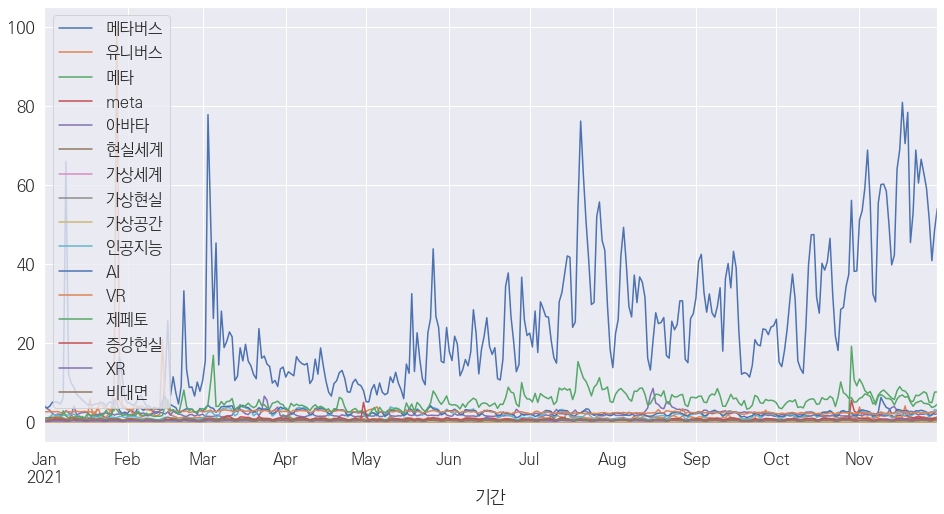

In [7]:
# '메타버스' 검색량 라인 플롯
df = pd.read_excel('/Users/charles/git/metaverse/data/datalab.xlsx', sheet_name='Sheet1' ,index_col='기간', parse_dates=True).drop(['Unnamed: 0'], axis=1)
df.plot(figsize=(16, 8))
plt.savefig('/Users/charles/git/metaverse/image/datalab.png', bbox_inches='tight')

In [8]:
# 월평균
df.groupby(df.index.month).mean()

,메타버스,유니버스,메타,meta,아바타,현실세계,가상세계,가상현실,가상공간,인공지능,AI,VR,제페토,증강현실,XR,비대면
기간,,,,,,,,,,,,,,,,
1,1.579660,5.495867,0.512994,0.165751,2.291698,0.002818,0.029406,0.292097,0.019327,1.376360,7.997727,3.099102,1.688148,0.483664,0.269638,0.851936
2,7.357492,2.539449,0.496044,0.232193,2.034070,0.002208,0.058630,0.320315,0.021254,0.975779,4.028744,3.146230,2.767026,0.465447,0.279381,0.740794
3,20.114187,0.864972,0.823304,0.361054,2.417959,0.008032,0.086628,0.624784,0.041398,2.716275,3.357622,2.832109,4.946497,0.930839,0.332245,0.623614
4,11.673981,0.918678,0.831308,0.312747,1.638331,0.004932,0.083186,0.666982,0.048256,2.769688,2.765872,2.760349,3.657885,0.960206,0.334072,0.536423
5,14.630176,0.886653,0.625787,0.274895,1.811807,0.006251,0.092798,0.657023,0.058691,2.657229,2.538613,2.746558,3.816744,0.760043,0.313216,0.406412
6,20.032950,0.840511,0.632863,0.320425,1.795740,0.004394,0.121573,0.583024,0.058403,2.071898,2.336252,2.541791,5.200906,0.758170,0.404695,0.365770
7,34.682497,1.122189,0.664848,0.492311,2.126549,0.003514,0.105442,0.534802,0.053869,1.581134,2.246551,2.308335,7.940940,0.658850,0.338980,0.626438
8,26.686544,1.238847,0.636476,0.375869,3.171360,0.004165,0.098142,0.499739,0.045135,1.245276,2.028742,2.483955,6.512172,0.629349,0.371959,0.517337
9,26.622484,1.298191,0.657602,0.384762,2.313582,0.005067,0.101549,0.601611,0.055169,1.901963,2.113563,2.404271,5.595236,0.729840,0.311085,0.425482


In [9]:
print('메타버스 검색량: ' + format(df.mean()['메타버스'], ".2f"))

메타버스 검색량: 22.85


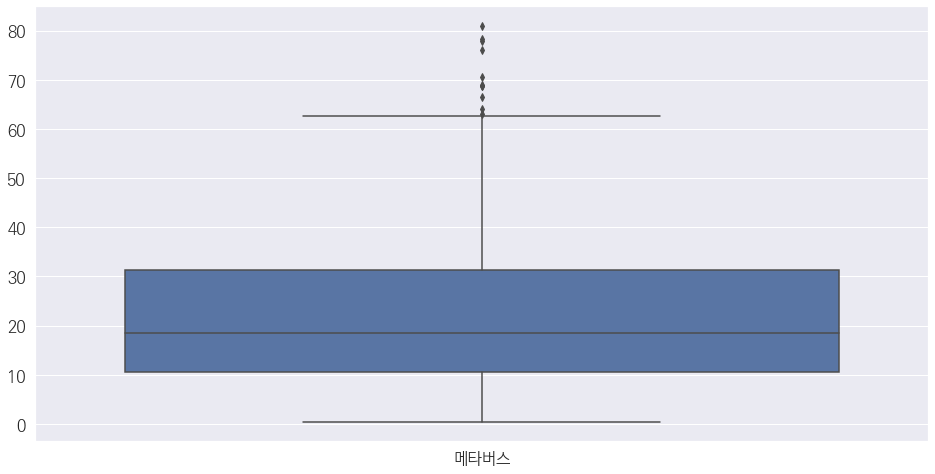

In [10]:
# '메타버스' 검색량 박스 플롯
plt.figure(figsize=(16, 8))
sns.boxplot(data=df[['메타버스']])
plt.savefig('/Users/charles/git/metaverse/image/datalab_boxplot.png', bbox_inches='tight')

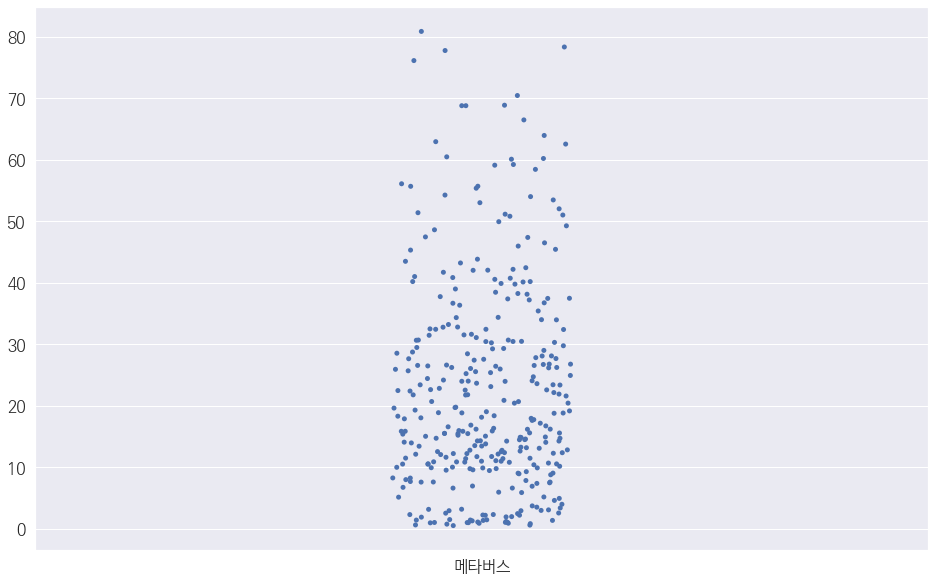

In [11]:
# '메타버스' 닷 플롯
plt.figure(figsize=(16, 10))
sns.stripplot(data=df[['메타버스']])
plt.savefig('/Users/charles/git/metaverse/image/datalab_dotplot.png', bbox_inches='tight')

In [12]:
# 피어슨 상관계수
print('유니버스 상관계수: ' + format(df.corrwith(df['메타버스'], method='pearson')['유니버스'], ".2f"))
print('메타 상관계수: ' + format(df.corrwith(df['메타버스'], method='pearson')['메타'], ".2f"))
print('meta 상관계수: ' + format(df.corrwith(df['메타버스'], method='pearson')['meta'], ".2f"))
print('아바타 상관계수: ' + format(df.corrwith(df['메타버스'], method='pearson')['아바타'], ".2f"))
print('현실세계 상관계수: ' + format(df.corrwith(df['메타버스'], method='pearson')['현실세계'], ".2f"))
print('가상세계 상관계수: ' + format(df.corrwith(df['메타버스'], method='pearson')['가상세계'], ".2f"))
print('가상현실 상관계수: ' + format(df.corrwith(df['메타버스'], method='pearson')['가상현실'], ".2f"))
print('가상공간 상관계수: ' + format(df.corrwith(df['메타버스'], method='pearson')['가상공간'], ".2f"))
print('인공지능 상관계수: ' + format(df.corrwith(df['메타버스'], method='pearson')['인공지능'], ".2f"))
print('AI 상관계수: ' + format(df.corrwith(df['메타버스'], method='pearson')['AI'], ".2f"))
print('VR 상관계수: ' + format(df.corrwith(df['메타버스'], method='pearson')['VR'], ".2f"))
print('제페토 상관계수: ' + format(df.corrwith(df['메타버스'], method='pearson')['제페토'], ".2f"))
print('증강현실 상관계수: ' + format(df.corrwith(df['메타버스'], method='pearson')['증강현실'], ".2f"))
print('XR 상관계수: ' + format(df.corrwith(df['메타버스'], method='pearson')['XR'], ".2f"))
print('비대면 상관계수: ' + format(df.corrwith(df['메타버스'], method='pearson')['비대면'], ".2f"))

유니버스 상관계수: -0.07
메타 상관계수: 0.58
meta 상관계수: 0.64
아바타 상관계수: -0.04
현실세계 상관계수: 0.18
가상세계 상관계수: 0.44
가상현실 상관계수: 0.43
가상공간 상관계수: 0.55
인공지능 상관계수: 0.14
AI 상관계수: -0.17
VR 상관계수: -0.40
제페토 상관계수: 0.76
증강현실 상관계수: 0.22
XR 상관계수: 0.58
비대면 상관계수: -0.24


In [13]:
# 월평균 검색량
df['Year'] = df.index.year
df['Month'] = df.index.month
df = df.groupby(by=[df.index.year, df.index.month]).mean()

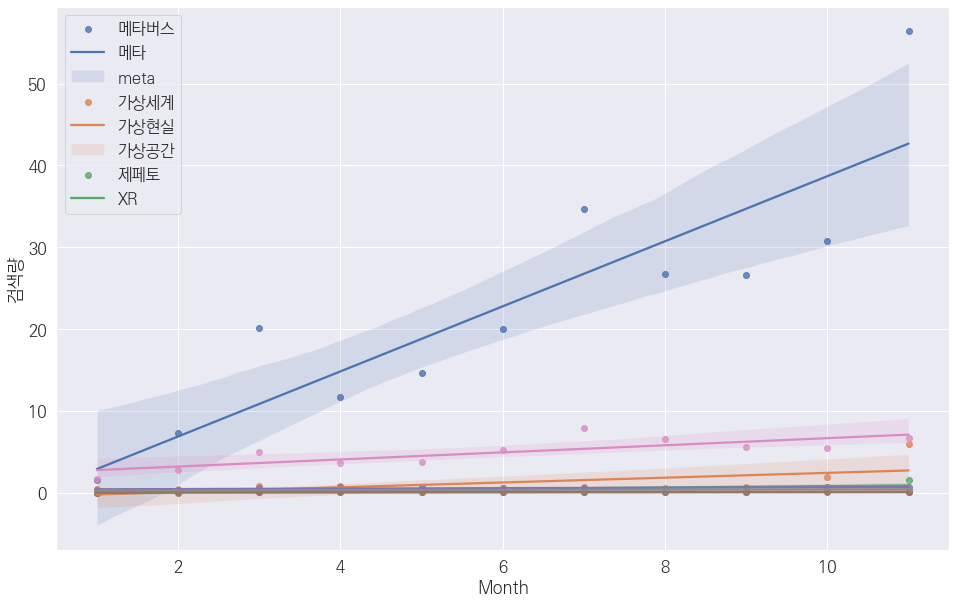

In [14]:
# '메타버스', 키워드 검색량 회귀 플롯
plt.figure(figsize=(16, 10))
sns.regplot(x=df['Month'], y=df['메타버스'], data=df, order=1)
sns.regplot(x=df['Month'], y=df['메타'], data=df, order=1)
sns.regplot(x=df['Month'], y=df['meta'], data=df, order=1)
sns.regplot(x=df['Month'], y=df['가상세계'], data=df, order=1)
sns.regplot(x=df['Month'], y=df['가상현실'], data=df, order=1)
sns.regplot(x=df['Month'], y=df['가상공간'], data=df, order=1)
sns.regplot(x=df['Month'], y=df['제페토'], data=df, order=1)
sns.regplot(x=df['Month'], y=df['XR'], data=df, order=1)
plt.ylabel('검색량')
plt.legend(labels=['메타버스', '메타', 'meta', '가상세계', '가상현실', '가상공간', '제페토', 'XR'])
plt.savefig('/Users/charles/git/metaverse/image/datalab_regplot.png', bbox_inches='tight')
plt.show()

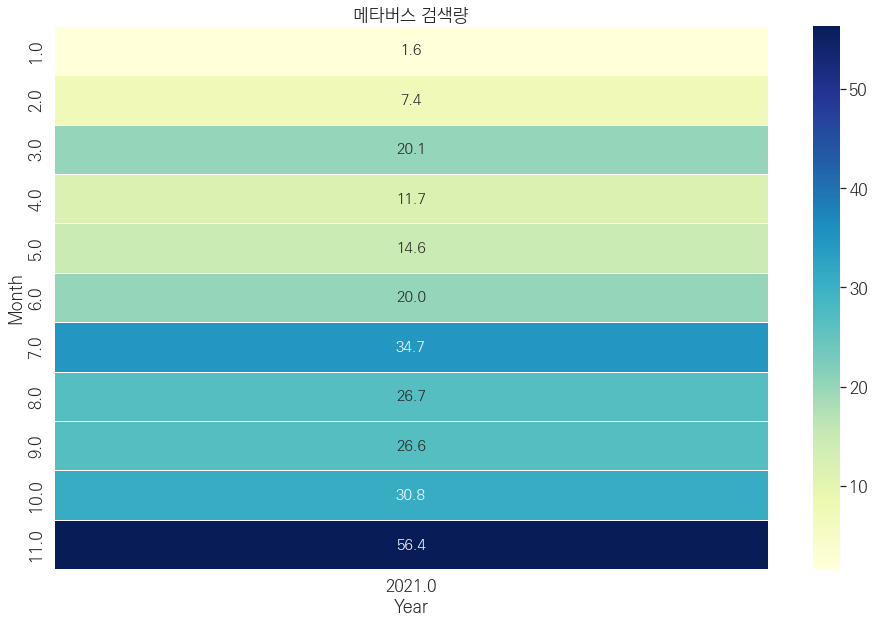

In [15]:
# '메타버스' 열지도
f, ax = plt.subplots(figsize=(16, 10))
sns.heatmap(df.pivot("Month", "Year", "메타버스"), cmap="YlGnBu",
            annot=True, annot_kws={"size": 15}, fmt='.1f', linewidths=.5, ax=ax)
ax.set_title('메타버스 검색량')
plt.savefig('/Users/charles/git/metaverse/image/datalab_heatmap.png', bbox_inches='tight')